# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from scipy.stats import f_oneway

### 1.   Load Dataset

In [3]:
train_data = pd.read_csv('/Users/ronikj/Downloads/salary_training.csv')
test_data = pd.read_csv('/Users/ronikj/Downloads/salary_test.csv')
val_data = pd.read_csv('/Users/ronikj/Downloads/salary_validation.csv')

### 2. Explore Dataset

In [4]:
print('Shape of the training dataset:', train_data.shape)
print('Shape of the testing dataset:', test_data.shape)
print('Shape of the Validation dataset:', val_data.shape)

train_data.head()

Shape of the training dataset: (2998, 31)
Shape of the testing dataset: (599, 31)
Shape of the Validation dataset: (599, 31)


,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,...,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.80,2009,84.00,6920,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,2010,64.50,6624,2,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,2007,85.17,9084,2,B.Tech/B.E.,electronics & telecommunications,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,2009,86.00,8195,1,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,2008,75.00,4889,2,B.Tech/B.E.,biotechnology,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
print('Train dataset data types:\n', train_data.dtypes)

Train dataset data types:
 id                         int64
gender                    object
dob                       object
10percentage             float64
12graduation               int64
12percentage             float64
collegeid                  int64
collegetier                int64
degree                    object
specialization            object
collegegpa               float64
collegecityid              int64
collegecitytier            int64
graduationyear             int64
english                    int64
logical                    int64
quant                      int64
domain                   float64
computerprogramming        int64
electronicsandsemicon      int64
computerscience            int64
mechanicalengg             int64
electricalengg             int64
telecomengg                int64
civilengg                  int64
conscientiousness        float64
agreeableness            float64
extraversion             float64
nueroticism              float64
openess_to_exper

In [6]:
train_data.describe()

,id,10percentage,12graduation,12percentage,collegeid,collegetier,collegegpa,collegecityid,collegecitytier,graduationyear,...,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [7]:
test_val_ids = pd.concat([test_data['id'], val_data['id']])
overlap_train = train_data[train_data['id'].isin(test_val_ids)]

if not overlap_train.empty:
    print("Yes")
else:
    print("No")

Yes


In [8]:
train_data.isna().sum()

id                       0
gender                   0
dob                      0
10percentage             0
12graduation             0
12percentage             0
collegeid                0
collegetier              0
degree                   0
specialization           0
collegegpa               0
collegecityid            0
collegecitytier          0
graduationyear           0
english                  0
logical                  0
quant                    0
domain                   0
computerprogramming      0
electronicsandsemicon    0
computerscience          0
mechanicalengg           0
electricalengg           0
telecomengg              0
civilengg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
salary                   0
dtype: int64

With the above exploration conducted on the dataset, we now know that the training data contains 0 null values, we know the datatypes of each column, and we have a general description of how the integer column values are displaced. An interesting find is the fact that the validation and the test datasets contain duplicates in the training set. This indicates values in all three sets that could greatly affect our model's learning capacity. To avoid this problem, the validation and the test sets will not be considered moving forward with the experiment.

### 3. Explore Target variable

In [9]:
target = train_data['salary']

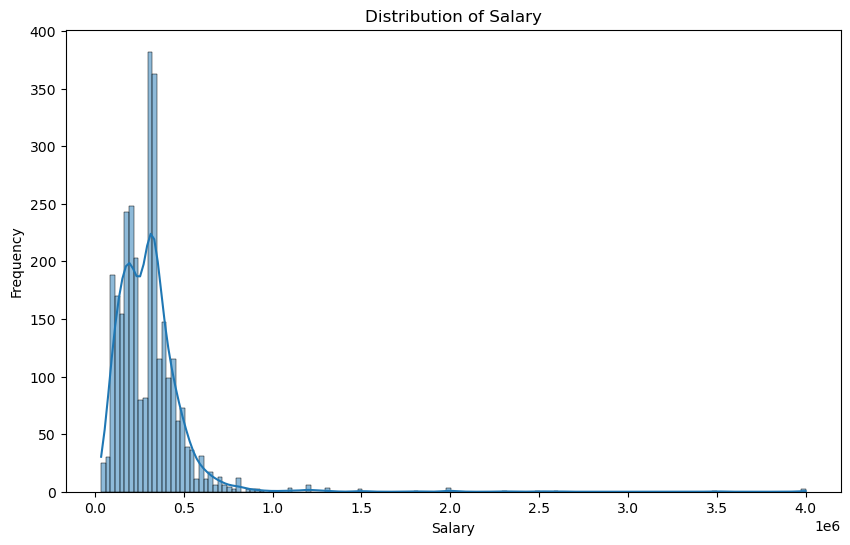

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

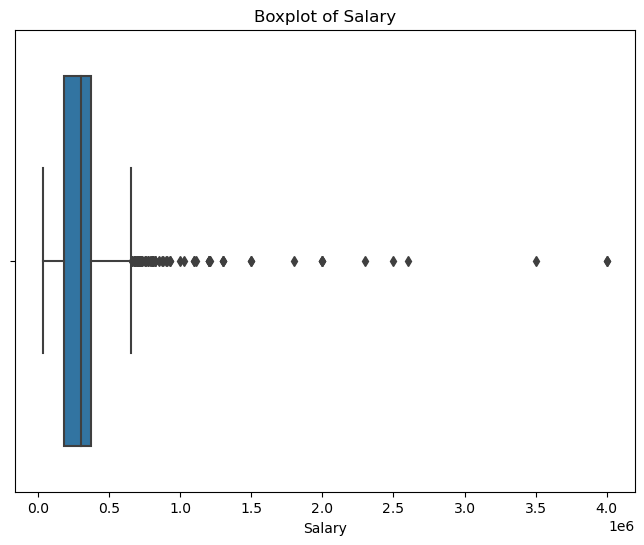

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data['salary'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

As seen in the box plot and the histogram, there exist major outliers in the target set. We see high salary variations which need to be looked into when we preprocess data

### 4. Explore Variables of Interest

#### 4.1 Numerical Columns

In [12]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
current_year = datetime.now()
train_data['dob'] = current_year.year - train_data['dob'].dt.year
train_data.rename(columns={'dob': 'age'}, inplace=True)

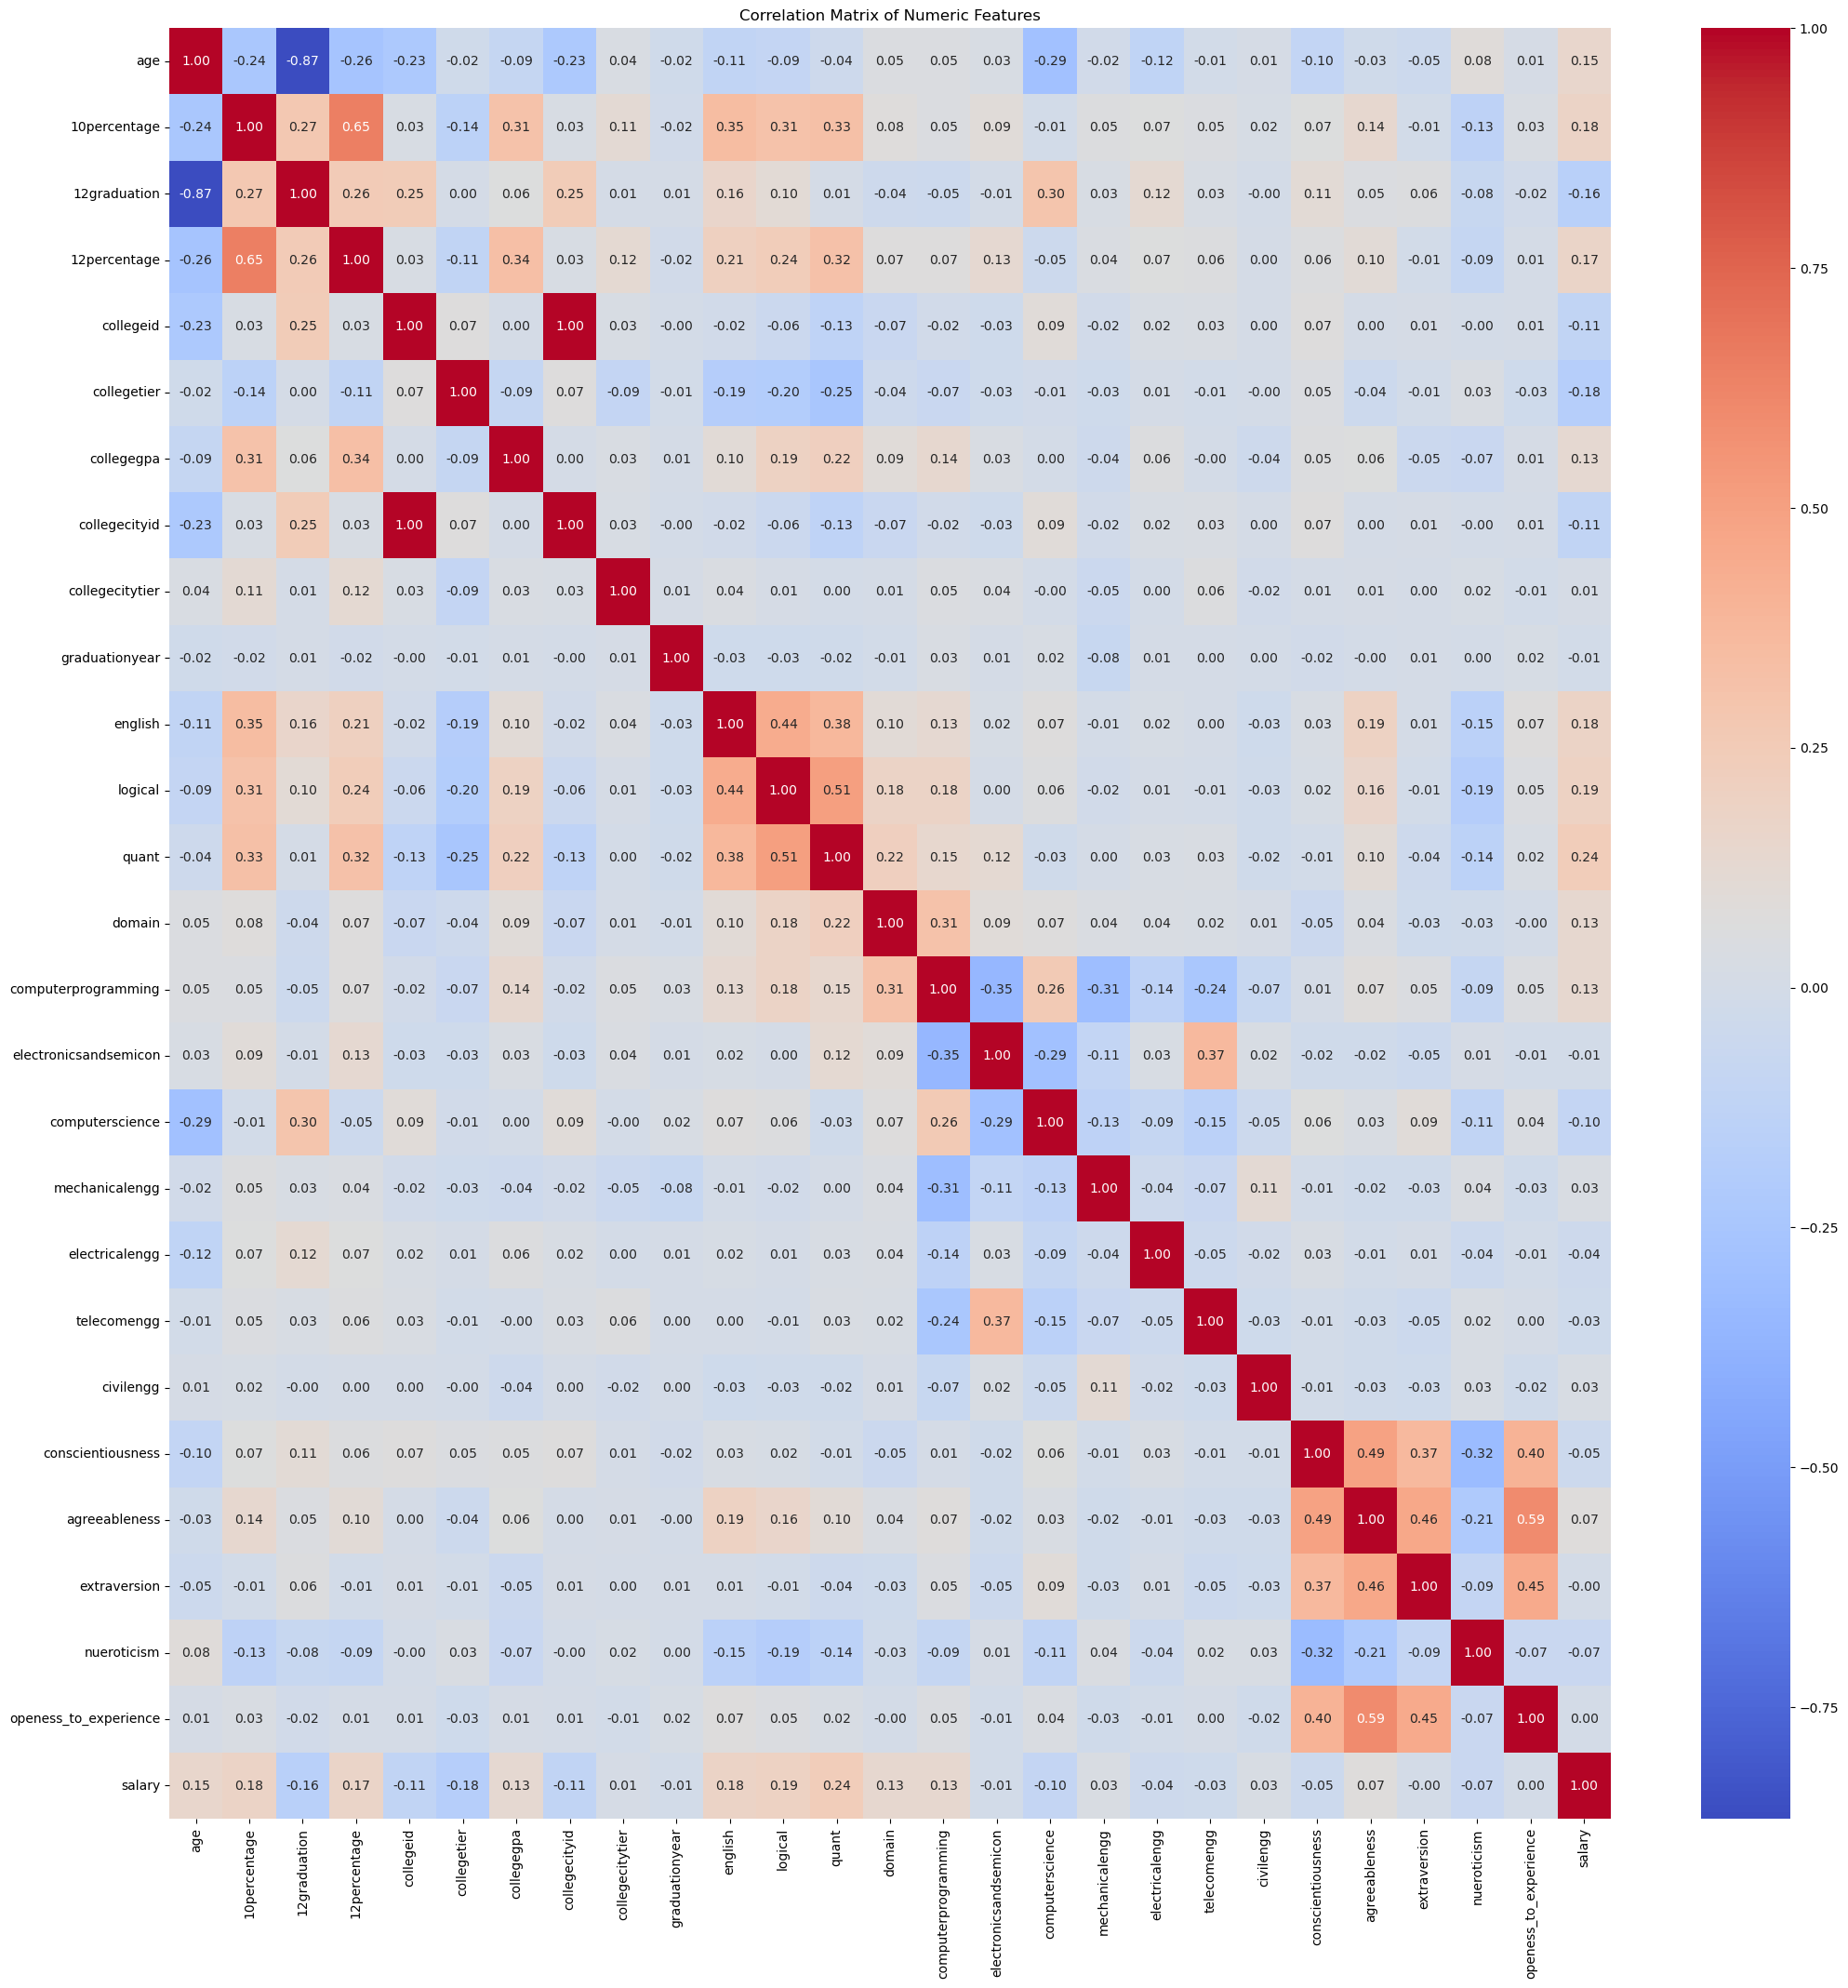

quant                  0.239345
logical                0.193647
10percentage           0.181414
english                0.179668
collegetier            0.177975
12percentage           0.172755
12graduation           0.161793
age                    0.153849
computerprogramming    0.134235
domain                 0.132845
collegegpa             0.131912
collegecityid          0.114908
collegeid              0.114908
computerscience        0.099373
agreeableness          0.074756
Name: salary, dtype: float64


In [13]:
numeric_data = train_data.drop(columns=['id']).select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

target_correlation = correlation_matrix['salary'].abs().sort_values(ascending=False)
top_15_correlated_features = target_correlation[1:16]

print(top_15_correlated_features)

In [14]:
train_num = train_data[['quant', 'logical', '10percentage', 'english', 'collegetier', '12percentage',
                            'computerprogramming', 'domain', 'age', 'salary']]

train_num.shape

(2998, 10)

#### 4.2 Categorical Columns

In [15]:
categorical_columns = ['degree', 'specialization', 'gender']  # List of categorical variable names

anova_results = {}
for col in categorical_columns:
    category_groups = [group for _, group in train_data.groupby(col)]
    anova_result = f_oneway(*[group['salary'] for group in category_groups])
    p_value = anova_result.pvalue
    anova_results[col] = p_value

anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p-value'])
print(anova_df)

                     p-value
degree          2.073730e-01
specialization  9.387733e-08
gender          3.303433e-02


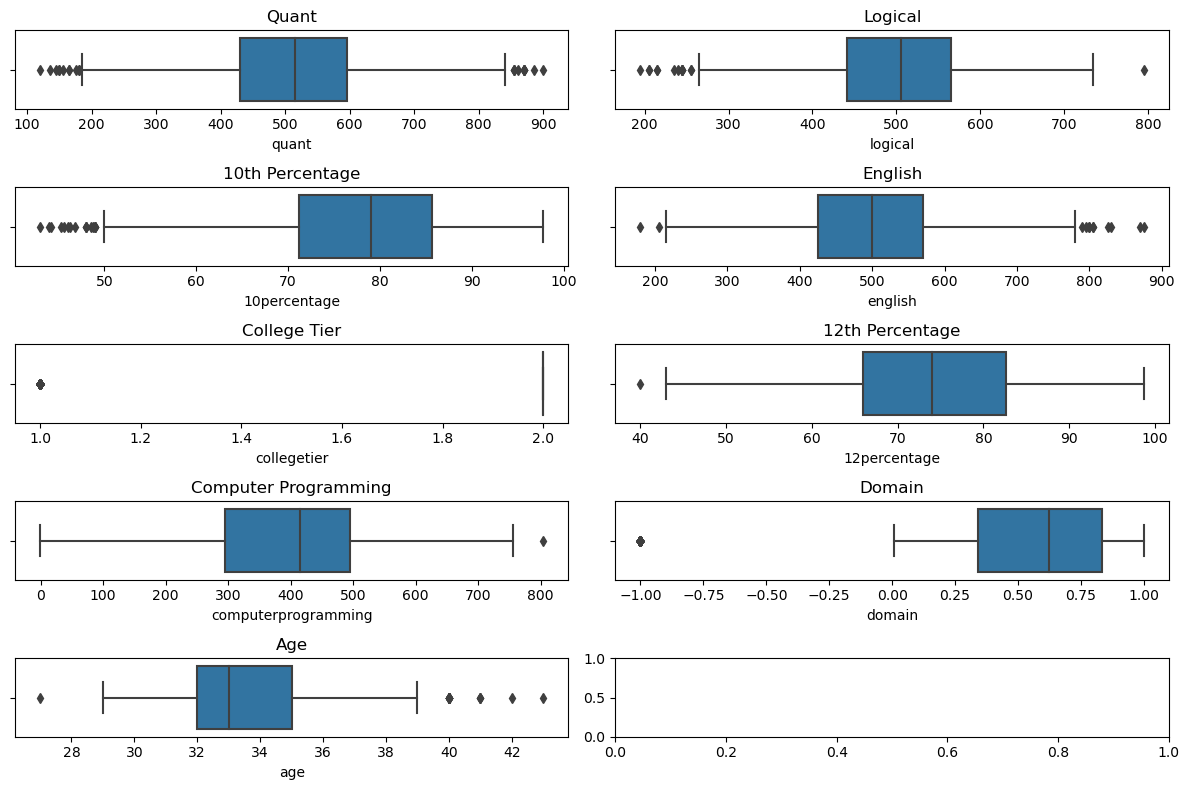

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8))

sns.boxplot(x=train_num['quant'], ax=axes[0, 0])
axes[0, 0].set_title('Quant')

sns.boxplot(x=train_num['logical'], ax=axes[0, 1])
axes[0, 1].set_title('Logical')

sns.boxplot(x=train_num['10percentage'], ax=axes[1, 0])
axes[1, 0].set_title('10th Percentage')

sns.boxplot(x=train_num['english'], ax=axes[1, 1])
axes[1, 1].set_title('English')

sns.boxplot(x=train_num['collegetier'], ax=axes[2, 0])
axes[2, 0].set_title('College Tier')

sns.boxplot(x=train_num['12percentage'], ax=axes[2, 1])
axes[2, 1].set_title('12th Percentage')

sns.boxplot(x=train_num['computerprogramming'], ax=axes[3, 0])
axes[3, 0].set_title('Computer Programming')

sns.boxplot(x=train_num['domain'], ax=axes[3, 1])
axes[3, 1].set_title('Domain')

sns.boxplot(x=train_num['age'], ax=axes[4, 0])
axes[4, 0].set_title('Age')

plt.tight_layout()
plt.show()

The target numerical target variables are chosen based on the top 10 features with the highest correlation ignoring the 12graduation feature which does not add weightage to our business case.

For the categorical columns, we will be choosing the Specialization field as it gave the best p-value. This indicates a correlation between the specialization and the target column which in our case indicates the salary.

On exploring these features, we find outliers exist which need to be dealt with to avoid erratic predictions from our model.

### 5. Prepare Data

In [17]:
Q1 = train_num.quantile(0.25)
Q3 = train_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_num = train_num.clip(lower=lower_bound, upper=upper_bound, axis=1)

/var/folders/v6/v_b2mbgd09n8qd652j7jycg80000gn/T/ipykernel_11320/2430332408.py:8: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  train_num = train_num.clip(lower=lower_bound, upper=upper_bound, axis=1)


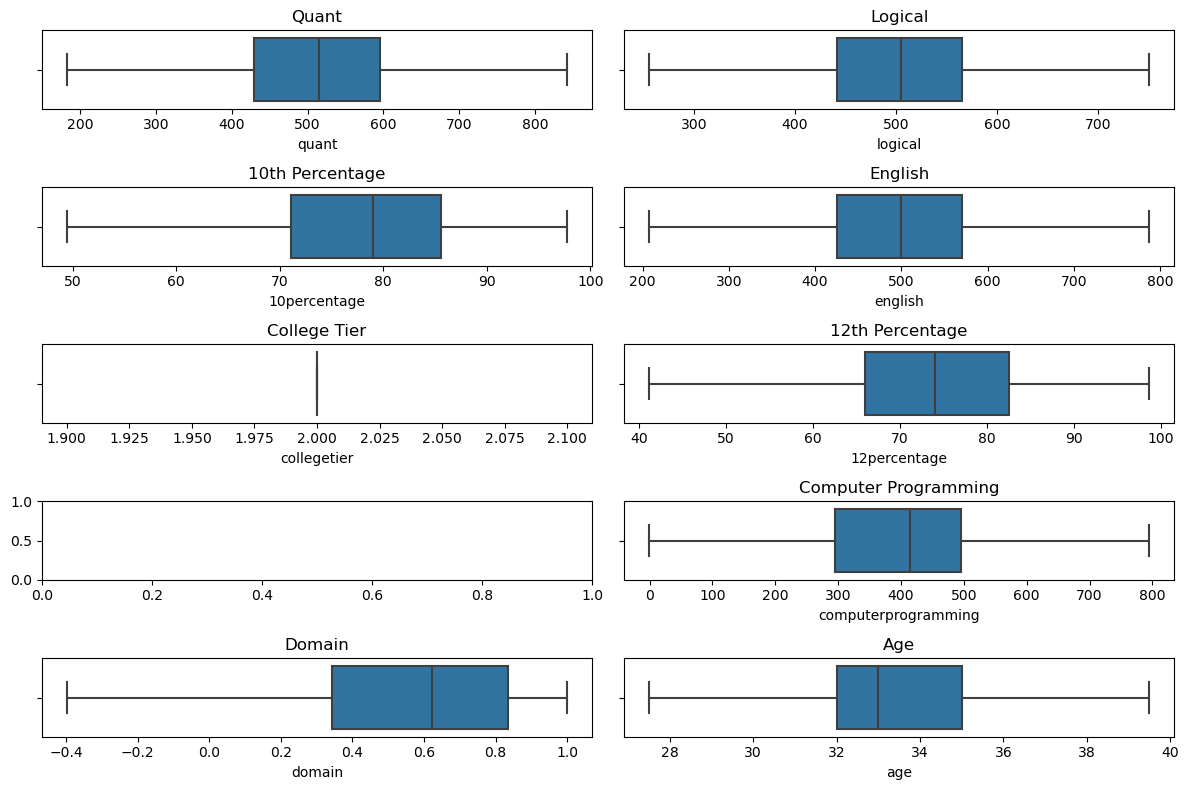

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8))

sns.boxplot(x=train_num['quant'], ax=axes[0, 0])
axes[0, 0].set_title('Quant')

sns.boxplot(x=train_num['logical'], ax=axes[0, 1])
axes[0, 1].set_title('Logical')

sns.boxplot(x=train_num['10percentage'], ax=axes[1, 0])
axes[1, 0].set_title('10th Percentage')

sns.boxplot(x=train_num['english'], ax=axes[1, 1])
axes[1, 1].set_title('English')

sns.boxplot(x=train_num['collegetier'], ax=axes[2, 0])
axes[2, 0].set_title('College Tier')

sns.boxplot(x=train_num['12percentage'], ax=axes[2, 1])
axes[2, 1].set_title('12th Percentage')

sns.boxplot(x=train_num['computerprogramming'], ax=axes[3, 1])
axes[3, 1].set_title('Computer Programming')

sns.boxplot(x=train_num['domain'], ax=axes[4, 0])
axes[4, 0].set_title('Domain')

sns.boxplot(x=train_num['age'], ax=axes[4, 1])
axes[4, 1].set_title('Age')

plt.tight_layout()
plt.show()

In [19]:
count_minus_one = (train_num['computerprogramming'] == -1).sum()
print(count_minus_one)

650


In [20]:
indices = train_num[train_num['computerprogramming'] == -1].index

train_num.loc[indices, 'computerprogramming'] = np.nan

mean_value = train_num['computerprogramming'].mean()

train_num['computerprogramming'].fillna(mean_value, inplace=True)

train_num.shape

(2998, 10)

In [21]:
label = LabelEncoder()

train_data_filtered = train_data[train_data.index.isin(train_num.index)]  # Filtered train_data
train_num['specialization_encoded'] = label.fit_transform(train_data_filtered['specialization'])

numeric_columns = train_num.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
train_num[numeric_columns] = scaler.fit_transform(train_num[numeric_columns])

train_num.head()

,quant,logical,10percentage,english,collegetier,12percentage,computerprogramming,domain,age,salary,specialization_encoded
0,2.432643,1.892646,1.016186,1.420185,0.0,0.868785,4.136420e-01,0.421884,0.249636,1.094253,1.497270
1,-2.500658,-0.754060,-2.076659,-0.581010,0.0,-0.885233,-9.865498e-01,-0.568227,0.249636,-1.328135,-0.810604
2,-0.075118,-0.293763,-0.035181,-0.152183,0.0,0.974026,-6.632640e-16,0.787905,0.827781,-0.279638,-0.041313
3,0.993763,1.374812,0.664726,1.658423,0.0,1.048685,2.397247e+00,1.252765,-0.328509,0.913478,-0.810604
4,-1.226222,-0.063615,0.433767,0.705472,0.0,0.059238,-1.569963e+00,-0.747762,0.249636,-0.677344,-1.689794


In the preparation portion of the notebook, we done the following:
1. Since the overall number of rows is small at 2998, we have decided to adjust the outliers rather than drop them. This keeps our overall training data at the same number while ensuring no outliers exist. The same has been verified using the box plots for a second time.

2. The -1 values from computerprogramming have been dealt with by replacing them with the overall mean. This has been done as a large number of rows consist of this value.

3. The chosen categorical column which in our case is the Specialization field has been encoded using label encoder and has been integrated into the main training dataset.

4. Finally the entire dataset has been scaled to a single proportion using Standard Scaler to get it ready for model training.

### 6. Split Dataset

In [22]:
X = train_num.drop(columns=['salary'])
y = train_num['salary'] 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (2398, 10)
X_test shape: (300, 10)
X_val shape: (300, 10)
y_train shape: (2398,)
y_test shape: (300,)
y_val shape: (300,)


The training dataset has been split into validation and testing sets. Due to the small number of training rows, we have taken 20%% of the overall number and split them into the testing and validation datasets.
This gives us the shapes of the datasets that have been depicted above.

### 7. Baseline Model

In [23]:
y_train_central = np.mean(y_train)

In [24]:
y_train_base = np.full(y_train.shape, y_train_central)
y_val_base = np.full(y_val.shape, y_train_central)
y_test_base = np.full(y_test.shape, y_train_central)

In [25]:
train_rmse = mean_squared_error(y_train, y_train_base, squared=False)
val_rmse = mean_squared_error(y_val, y_val_base, squared=False)
test_rmse = mean_squared_error(y_test, y_test_base, squared=False)

In [26]:
print("Baseline Model Performance:")
print(f"Training RMSE: {train_rmse.round(2)}")
print(f"Validation RMSE: {val_rmse.round(2)}")
print(f"Testing RMSE: {test_rmse.round(2)}")

Baseline Model Performance:
Training RMSE: 1.0
Validation RMSE: 1.0
Testing RMSE: 0.96


The baseline model as a mean overfits the data and gives values of 1. This indicates the model will not perform well when unseen data is presented to it.

### 8. Train Machine Learning Model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

In [29]:
y_pred = model.predict(X_val)
val_rmse = mean_squared_error(y_val, y_pred, squared=False)

In [30]:
y_pred_test = model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

### 9. Assess Model Performance

In [31]:
model_train_perf = train_rmse.round(2)
model_valid_perf = val_rmse.round(2)
model_test_perf = test_rmse.round(2)

print("Root Mean Squared Error (RMSE) on Training Set:", model_train_perf)
print("Root Mean Squared Error (RMSE) on Validation Set:", model_valid_perf)
print("Root Mean Squared Error (RMSE) for Testing Set:", model_test_perf)

Root Mean Squared Error (RMSE) on Training Set: 0.87
Root Mean Squared Error (RMSE) on Validation Set: 0.87
Root Mean Squared Error (RMSE) for Testing Set: 0.84


We are getting an overall root mean squared error of 0.87 on the validation dataset. This indicates our model is working well in predicting the target variable from the chosen fields.

Since it works well with the validation dataset, the model is implememted into our final testing dataset. We see a final RMSE score of 0.84 which indicates a model that can accurately predict Salary once scaled back into the original form.